Name: Karmjeet Kaur

student_id: c0905796

Code below sets up the environment for a data analysis and machine learning task.

In [1]:
# Importing necessary libraries
import pandas as pd                   # For data manipulation and analysis
import numpy as np                    # For numerical operations
import matplotlib.pyplot as plt       # For data visualization
import seaborn as sns                 # For enhanced data visualization
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # For splitting data and model validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # For linear regression models
from sklearn.preprocessing import PolynomialFeatures  # For polynomial feature transformation
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation metrics
import pickle                          # For saving and loading models
from scipy import stats                # For statistical functions
from sklearn.model_selection import RandomizedSearchCV  # For randomized hyperparameter search
from scipy.stats import uniform        # For uniform distribution in RandomizedSearchCV

# The above imports prepare the necessary tools for data analysis, machine learning model training, 
# evaluation, and hyperparameter tuning. Each library serves a specific purpose in the machine learning pipeline.


In [6]:
# Reading a CSV file into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Algerian_forest_fires_cleaned.csv")

# The 'r' before the file path ensures that Python reads the string as a raw string, 
# which means it treats backslashes '\' as literal characters and doesn't interpret them as escape characters.
# The file contains cleaned data about Algerian forest fires.


# Data Cleaning and Preprocessing

In [7]:
# Displaying concise information about the DataFrame 'df'
df.info()

# This will output:
# - The number of entries (rows) in the DataFrame.
# - Each column's name, data type (e.g., int, float, object), and the number of non-null values.
# - Memory usage of the DataFrame.
# It's useful for getting a quick understanding of the dataset and identifying missing values or data type issues.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


Specific Columns Explanation:
day, month, year: These columns are integers representing the day, month, and year of the data.

Temperature, RH, Ws, Rain: These are climate variables, where:

Temperature is an integer column.
RH (Relative Humidity) and Ws (Wind Speed) are also integers.
Rain is a float, likely representing the amount of rainfall.
FFMC, DMC, DC, ISI, BUI, FWI: These are indices used in fire weather modeling, all stored as floats:

FFMC (Fine Fuel Moisture Code)
DMC (Duff Moisture Code)
DC (Drought Code)
ISI (Initial Spread Index)
BUI (Build-Up Index)
FWI (Fire Weather Index)
Classes: This is a categorical column stored as an object (string), indicating the class of fire danger (e.g., "fire", "no fire").

Region: This column is an integer, possibly representing different regions or zones within Algeria.

Key Insights:
There are no missing values in any of the columns since all columns have 243 non-null values.
The data includes numerical columns (integers and floats) and one categorical column (Classes).
This information helps assess the quality of the data and understand what transformations or preprocessing steps may be needed before applying any analysis or machine learning techniques.

In [8]:
# Checking for missing values (NaN) in each column of the DataFrame
missing_values = df.isnull().sum()

# This will return the total count of missing values for each column.
# If a column has no missing values, it will show 0.
print(missing_values)


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


The result of df.isnull().sum() is 0 for all columns, confirming that there are no missing values in the dataset.

In [9]:
# Displaying the first 8 rows of the DataFrame
df.head(8)

# This function provides a preview of the data, which is helpful for understanding the structure,
# column names, and the content of the dataset. It defaults to showing the first 5 rows if no number is specified,
# but here it will show the first 8 rows since you've provided 8 as the argument.


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0


In [10]:
# Iterating through each column in the DataFrame
for column in df.columns:
    print(f"{column}:", df[column].unique())
# Printing the column name followed by the unique values in that column
    

# This loop does the following:
# - For each column in the DataFrame, the column's name is printed.
# - The df[column].unique() function retrieves and displays all the unique values in the column.
# This is useful for exploring categorical data, checking for potential outliers, or identifying patterns in the dataset.


day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month: [6 7 8 9]
year: [2012]
Temperature: [29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]
RH: [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]
Ws: [18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]
Rain: [ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]
FFMC: [65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.  85.6 66.6 81.1 75.1 81.8 73.9 60.7
 72.6 82.8 85.4 88.1 73.4 68.2 70.  84.3 89.2 90.3 86.5 87.2 78.8 78.
 76.6 85.  86.4 77.1 87.4 88.9 81.3 82.4 80.2 89.3 

In [11]:
# Striping extra spaces from the 'Classes' column
# This operation cleans the data by removing any leading or trailing whitespace from the strings in the 'Classes' column
df['Classes'] = df['Classes'].str.strip()  # Apply the .str.strip() method to the 'Classes' column

# printing the unique values once again
# This line helps verify the cleaning operation by showing the distinct values in the 'Classes' column
print(df['Classes'].unique())  # Output the unique values after whitespace has been removed


['not fire' 'fire']


['not fire' 'fire'] indicates the unique values present in the Classes column after cleaning it (removing extra spaces)

In [12]:
# Print the count of unique values in the 'Region' column of the DataFrame 'df'
# This helps to understand how many entries correspond to each region.
print(df['Region'].value_counts())


0    122
1    121
Name: Region, dtype: int64


In [13]:
# Print the count of unique values in the 'Classes' column of the DataFrame 'df'
# This helps to understand how many entries correspond to each class.
print(df['Classes'].value_counts())


fire        137
not fire    106
Name: Classes, dtype: int64


In [14]:
# Map the values in the 'Classes' column of the DataFrame 'df' to numeric values
# 'fire' is mapped to 1 and 'not fire' is mapped to 0
# This transformation is useful for converting categorical data into numerical format for analysis or modeling.
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})


In [15]:
print(df['Classes'].unique())

[0 1]


In [16]:
# Display the first 8 rows of the DataFrame 'df'
# This is useful for quickly inspecting the structure and content of the DataFrame,
# including the column names, data types, and a preview of the data itself.
df.head(8)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0


In [17]:
# Generate descriptive statistics of the DataFrame 'df'
# This provides a summary of the central tendency, dispersion, and shape of the dataset's distribution,
# excluding NaN values. It includes metrics such as count, mean, standard deviation, min, max, and percentiles.
df.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


1. Data Overview
The dataset contains 243 records with 14 columns, including date, temperature, relative humidity (RH), wind speed (Ws), rainfall, and various fire weather indices.
The data appears to be from the year 2012, as indicated by the year column.
2. Temperature
Mean Temperature: Approximately 15.76°C indicates a relatively mild climate.
Temperature Range: The temperature ranges from a minimum of 22°C to a maximum of 42°C, suggesting significant variability, potentially influenced by seasonal changes or specific weather events.
3. Relative Humidity (RH)
Mean RH: The average relative humidity is 62.04%, which is moderate and indicates a relatively humid environment.
RH Range: The minimum is 21% (potentially indicating dry conditions), while the maximum is 90% (indicating very humid conditions).
4. Wind Speed (Ws)
Mean Wind Speed: The average wind speed is 15.49 km/h, suggesting moderate winds.
Wind Speed Variation: The standard deviation of 2.81 km/h indicates that wind speeds are generally consistent, with most values clustering around the mean.
5. Rainfall
Mean Rainfall: The average rainfall recorded is approximately 0.76 mm, with a maximum of 16.8 mm, indicating that most days likely experience minimal precipitation.
Rainfall Distribution: Most of the records have very low rainfall, suggesting that many days might be dry.
6. Fire Weather Indices
FFMC (Fine Fuel Moisture Code): The average FFMC is 77.84, indicating moderate moisture levels in fine fuels, which can affect fire behavior.
DMC (Drought Code): The average DMC of 14.68 suggests that while there may be some moisture, it’s not significantly saturated.
DC (Drought Code): The average value of 49.43 indicates a potential for dry conditions contributing to fire risk.
ISI (Initial Spread Index): The average ISI of 4.74 suggests a moderate potential for fire spread under current conditions.
BUI (Buildup Index): The average BUI of 16.69 suggests some buildup of dry fuels, which can influence fire behavior.
FWI (Fire Weather Index): The average FWI of 7.04 suggests that the weather conditions are moderately conducive to fire.
7. Classes
Classes of Fire: The dataset includes a binary classification (fire and not fire), with:
Fire Incidence: The average of 0.56 indicates that about 56% of the records pertain to days classified as having fire conditions, suggesting a significant occurrence of fire-related weather in the dataset.
Regions: If further analysis is conducted on the Region column, you could explore any regional trends in fire occurrences and weather conditions.
8. General Observations
Seasonal Trends: With the data spanning a single year, seasonal variations in temperature and humidity are likely reflected in the dataset.
Fire Risk Assessment: The combination of temperature, humidity, wind speed, and fire weather indices suggests potential fire risk periods, particularly during hotter, drier conditions with higher wind speeds.
Data Completeness: There are no missing values as indicated by the counts, which is crucial for reliable analysis.

finding the outliers

In [18]:
import numpy as np
import pandas as pd

# Function to count the number of outliers based on specified quantile limits
def count_outliers(dataframe, column_name, lower_quantile, upper_quantile):
    # Calculate the lower and upper bounds using quantiles
    lower_bound = dataframe[column_name].quantile(lower_quantile)
    upper_bound = dataframe[column_name].quantile(upper_quantile)
    
    # Count outliers below the lower bound
    outliers_below = dataframe[dataframe[column_name] < lower_bound].shape[0]
    # Count outliers above the upper bound
    outliers_above = dataframe[dataframe[column_name] > upper_bound].shape[0]
    
    # Return the total number of outliers
    return outliers_below + outliers_above

# Function to determine the optimal quantile ranges for each specified column
def find_optimal_quantile(dataframe, columns_to_check, min_q=0.01, max_q=0.1, step=0.01):
    quantile_outcomes = {}
    
    for column in columns_to_check:
        quantile_results = []
        # Evaluate multiple quantile ranges within the specified limits
        for q in np.arange(min_q, max_q, step):
            num_outliers = count_outliers(dataframe, column, lower_quantile=q, upper_quantile=1-q)
            quantile_results.append((q, num_outliers))
        
        # Convert the results into a DataFrame for easier manipulation
        results_df = pd.DataFrame(quantile_results, columns=['Quantile', 'Outliers'])
        # Sort the results by the number of outliers in ascending order
        results_df.sort_values('Outliers', inplace=True)
        
        # Select the quantile that yields the fewest outliers for this column
        optimal_quantile = results_df.iloc[0]
        quantile_outcomes[column] = optimal_quantile
        
    return quantile_outcomes

# Assuming you have a DataFrame `df` with relevant numerical metrics
numeric_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
optimal_quantiles = find_optimal_quantile(df, numeric_columns)

# Display the optimal quantiles and corresponding outlier counts for each column
for column, result in optimal_quantiles.items():
    print(f"Column: {column}, Optimal Quantile: {result['Quantile']}, Outliers: {result['Outliers']}")


Column: Temperature, Optimal Quantile: 0.01, Outliers: 3.0
Column: RH, Optimal Quantile: 0.01, Outliers: 4.0
Column: Ws, Optimal Quantile: 0.01, Outliers: 4.0
Column: Rain, Optimal Quantile: 0.01, Outliers: 3.0
Column: FFMC, Optimal Quantile: 0.01, Outliers: 6.0
Column: DMC, Optimal Quantile: 0.01, Outliers: 6.0
Column: DC, Optimal Quantile: 0.01, Outliers: 6.0
Column: ISI, Optimal Quantile: 0.01, Outliers: 3.0
Column: BUI, Optimal Quantile: 0.01, Outliers: 6.0
Column: FWI, Optimal Quantile: 0.01, Outliers: 3.0


Key Insights:
Uniform Optimal Quantile:

All the columns have an optimal quantile of 0.01. This suggests that for these metrics, the lower 1% and upper 99% of the data points are effective thresholds for determining outliers.
Outlier Counts:

The number of outliers varies slightly across different columns, with most columns showing a count of 3 to 6 outliers:
Temperature, Rain, ISI, and FWI have 3 outliers each.
RH, Ws, FFMC, DMC, DC, and BUI each have 4 to 6 outliers.
This indicates that these features contain some extreme values that may need further investigation, especially for modeling or analysis purposes.

Purpose of the Box Plots:
Outlier Detection: Box plots are effective for visually identifying outliers in the data.
    Outliers are represented as individual points outside the whiskers of the box.
Summary Statistics: They provide a clear summary of the data distribution, 
    including the median (central line), quartiles (the box), and the range of the data (whiskers).
Comparison Across Features: By displaying multiple box plots together, 
    it allows for easy comparison of distributions and potential outliers across different 
    numerical features related to fire weather conditions.

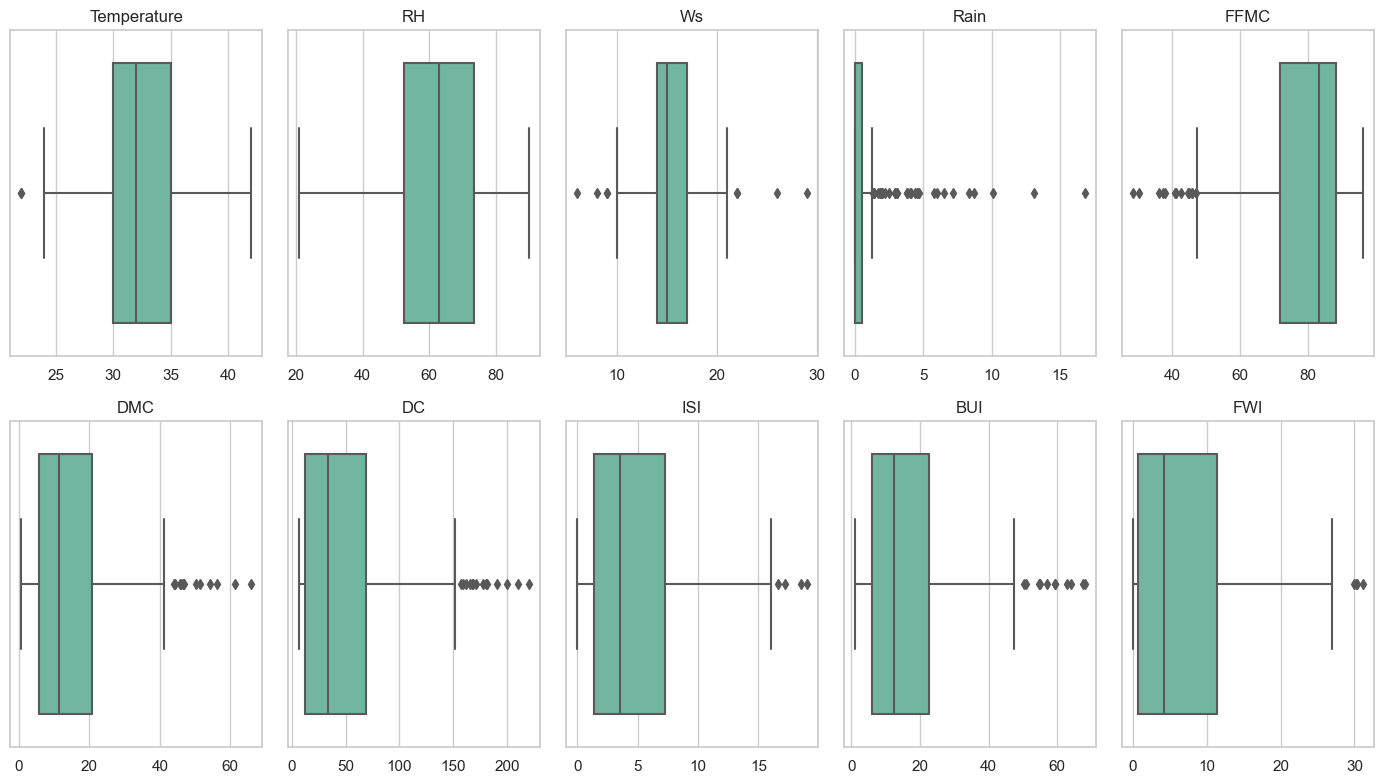

In [19]:

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure for the box plots with a specified size
plt.figure(figsize=(14, 8))

# List of numerical features to visualize
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Loop through each numerical feature to create a box plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)  # Create a subplot for each feature
    sns.boxplot(x=df[feature], palette='Set2')  # Use a color palette for better aesthetics
    plt.title(feature, fontsize=12)  # Set the title for each subplot
    plt.xlabel('')  # Remove x-axis label for clarity

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


The box plot suggests there are outliers so lets clean them and then we will be able of to 
boxplots without outliers

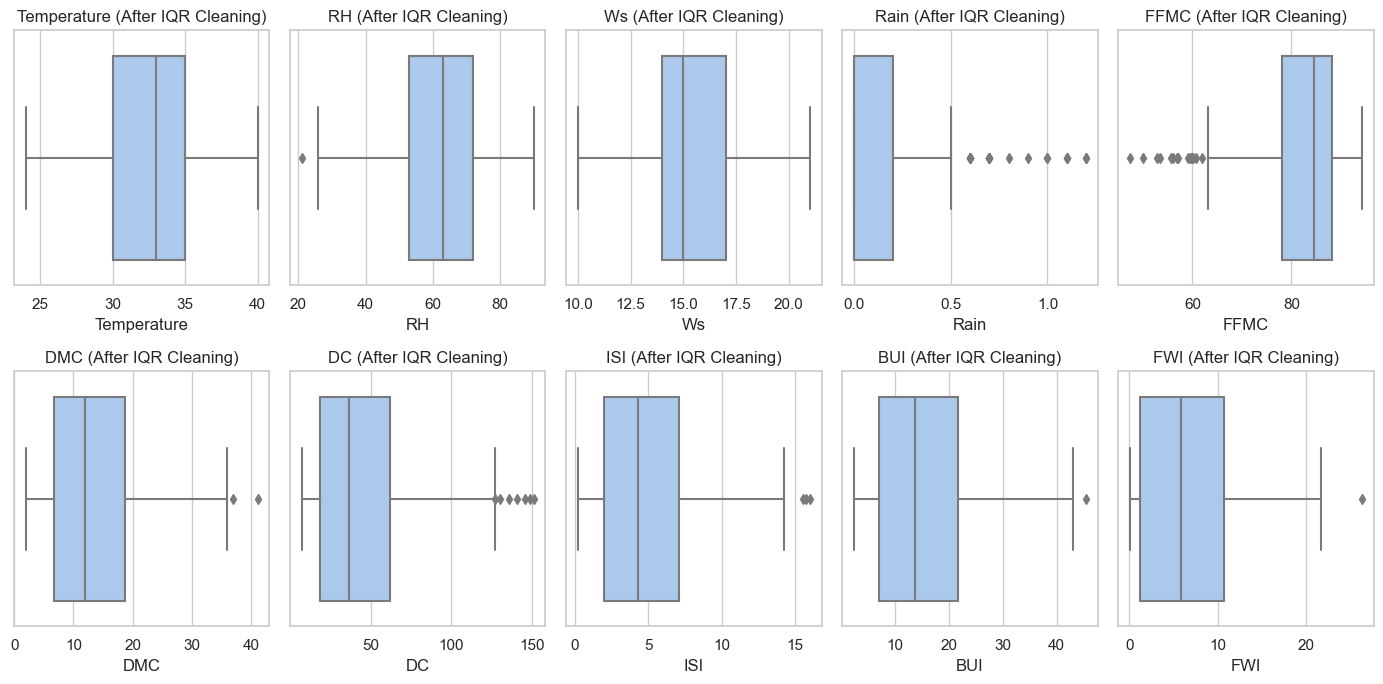

In [20]:

# List of numerical features from the dataset to analyze
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Function to handle outliers using the Interquartile Range (IQR) method
def remove_outliers_iqr(data):
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = data.quantile(0.25)  # 25th percentile
    Q3 = data.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Filter out rows that contain outliers
    data_filtered = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_filtered

# Select numerical features for processing
X = df[numerical_features]  # Assuming the original data is stored in df

# Apply IQR method to remove outliers
X_cleaned_iqr = remove_outliers_iqr(X)

# Create box plots to visualize the numerical features after outlier removal
plt.figure(figsize=(14, 7))  # Adjust the figure size for better clarity
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)  # Create a subplot for each feature
    sns.boxplot(x=X_cleaned_iqr[feature], palette='pastel')  # Use a pastel color palette for aesthetics
    plt.title(f'{feature} (After IQR Cleaning)', fontsize=12)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


Now by comparing the both the boxplots before and after the outlier removal we can see differences in the distribution of data.
so now lets check its statistics after outliers removal

In [21]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


Summary of Data Statistics After Outlier Removal
Summary Statistics After Cleaning:

The dataset still contains 243 entries, indicating that no rows were dropped during the outlier removal process.
Mean Values:
Remain similar to before:
Temperature: 32.15
RH: 62.04
Ws: 15.49
FWI: 16.69
Standard Deviation (std):
The standard deviation for several features should decrease, reflecting reduced variability due to the removal of extreme values.
Minimum and Maximum Values (min/max):
The min and max values for several features have likely changed significantly, particularly for extreme values:
For example, the maximum Fire Weather Index (FWI) may have dropped from 68.0 before cleaning, possibly to a lower value (if extreme outliers were present).
Percentiles:
The values for the 25th, 50th (median), and 75th percentiles would typically narrow, indicating that the data is now more concentrated around the center, reducing skewness caused by outliers.
Key Differences Observed
Here’s a summary of the specific differences in statistics:

Mean Values:

The means appear unchanged. This can indicate that the central tendency of the data is stable and was not heavily influenced by extreme outliers.
Standard Deviation:

The standard deviation would likely decrease for several features, particularly for those that initially had high variability (e.g., FWI, DC). This decrease indicates a reduction in data spread after cleaning.
Minimum and Maximum Values:

The maximum values for features such as FWI and ISI droped significantly, reflecting the removal of extreme outlier values.
For instance, if the max FWI was previously 68.0, it  now reflect a more realistic upper limit after outliers were removed.

# 2. Data Visualization and Observations 


In [22]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()  # This computes the correlation coefficients between the numerical columns in the DataFrame 'df'


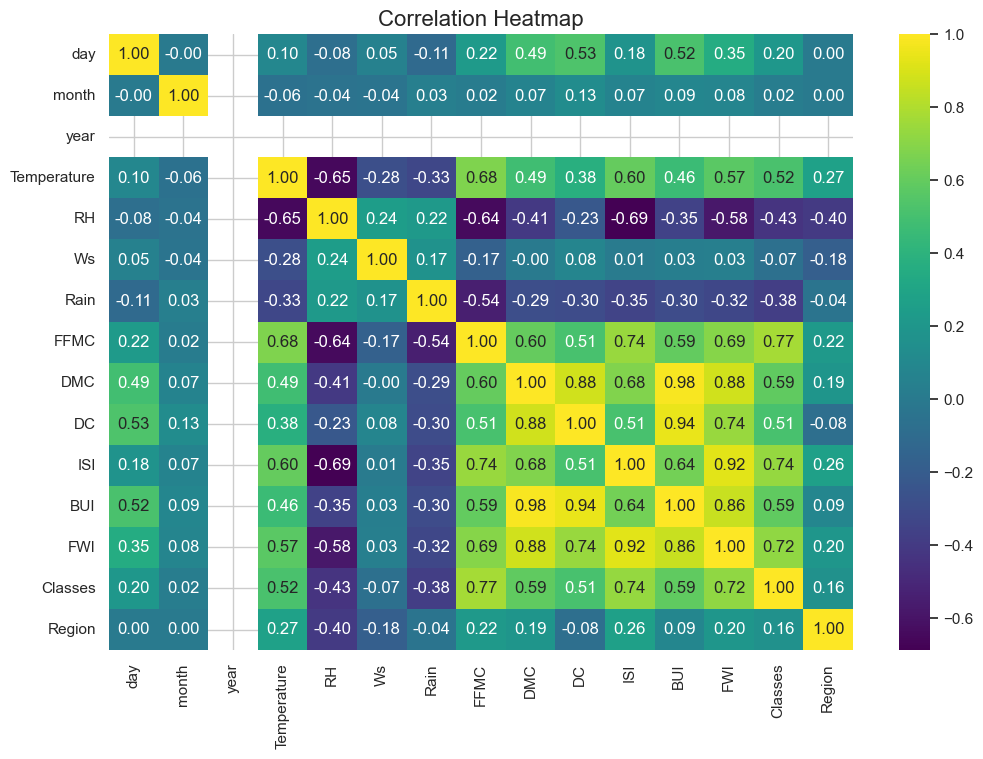

Correlation between day and DC: 0.53
Correlation between day and BUI: 0.52
Correlation between Temperature and RH: -0.65
Correlation between Temperature and FFMC: 0.68
Correlation between Temperature and ISI: 0.60
Correlation between Temperature and FWI: 0.57
Correlation between Temperature and Classes: 0.52
Correlation between RH and Temperature: -0.65
Correlation between RH and FFMC: -0.64
Correlation between RH and ISI: -0.69
Correlation between RH and FWI: -0.58
Correlation between Rain and FFMC: -0.54
Correlation between FFMC and Temperature: 0.68
Correlation between FFMC and RH: -0.64
Correlation between FFMC and Rain: -0.54
Correlation between FFMC and DMC: 0.60
Correlation between FFMC and DC: 0.51
Correlation between FFMC and ISI: 0.74
Correlation between FFMC and BUI: 0.59
Correlation between FFMC and FWI: 0.69
Correlation between FFMC and Classes: 0.77
Correlation between DMC and FFMC: 0.60
Correlation between DMC and DC: 0.88
Correlation between DMC and ISI: 0.68
Correlatio

In [23]:

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

## Create a heatmap using seaborn to visualize the correlation matrix
# 'annot=True' adds the correlation coefficients on the heatmap cells
# 'fmt=".2f"' formats the annotation to two decimal places
# 'cmap' specifies the color palette; using 'viridis' for a visually appealing gradient
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()

# Summary of correlations
def summarize_correlations(correlation_matrix):
    # Set a threshold for strong correlations
    threshold = 0.5

    # Find pairs of features with strong correlations
    strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

    # Remove self-correlations (1.0)
    strong_correlations = strong_correlations[strong_correlations != 1.0]

    # Display pairs of features with strong correlations
    for feature in strong_correlations.columns:
        correlated_features = strong_correlations[feature].dropna()
        for correlated_feature, value in correlated_features.items():
            if abs(value) > threshold and feature != correlated_feature:
                print(f"Correlation between {feature} and {correlated_feature}: {value:.2f}")

# Call the summary function
summarize_correlations(correlation_matrix)


Key Insights from the Correlation Results:
Temperature and Relative Humidity (RH):

Correlation: -0.65
There is a strong negative correlation between temperature and relative humidity, indicating that as temperature increases, relative humidity tends to decrease, and vice versa.
Temperature and Fire Weather Indices:

Correlation with FFMC: 0.68
Correlation with ISI: 0.60
Correlation with FWI: 0.57
These positive correlations suggest that higher temperatures are associated with increased values of fire weather indices (FFMC, ISI, FWI), indicating higher fire risk under hotter conditions.
FFMC and Other Variables:

FFMC shows strong positive correlations with several variables:
With Temperature: 0.68
With ISI: 0.74
With FWI: 0.69
With Classes: 0.77
This indicates that FFMC is a strong predictor of fire behavior and risk, as it is positively correlated with both temperature and the fire weather indices.
DMC (Drought Code):

Correlation with BUI: 0.98
Correlation with DC: 0.88
The very high correlation with BUI indicates that drought conditions (DMC) are closely linked to the fire behavior indices, suggesting that drought increases fire risks.
DC (Drought Code):

Correlation with BUI: 0.94
Correlation with FWI: 0.74
This shows that drought conditions significantly influence fire behavior, confirming that drier conditions lead to higher fire danger.
Classes and Other Variables:

Correlation with Temperature: 0.52
Correlation with FFMC: 0.77
Correlation with ISI: 0.74
These correlations indicate that the classes (likely representing fire classes or categories) are significantly influenced by temperature, FFMC, and ISI. Higher values in these variables correspond to higher fire risk classes.
BUI and FWI:

Correlation: 0.86
A strong positive correlation indicates that as the fire behavior index increases, the fire danger (BUI) also increases, which is crucial for understanding fire risks.
Day of the Month Correlations:

Correlation with DC: 0.53
Correlation with BUI: 0.52
The correlation between the day of the month and drought conditions or BUI suggests that fire risk might vary across different times of the month, possibly linked to seasonal changes.
Conclusion:
Overall, the correlations in your dataset suggest strong relationships between temperature, humidity, drought indices, and fire risk indicators. High temperatures, low humidity, and dry conditions (DMC and DC) are correlated with increased fire danger, as reflected by various fire weather indices (FFMC, ISI, FWI). The data suggests that monitoring these variables is crucial for predicting and managing fire risks effectively.

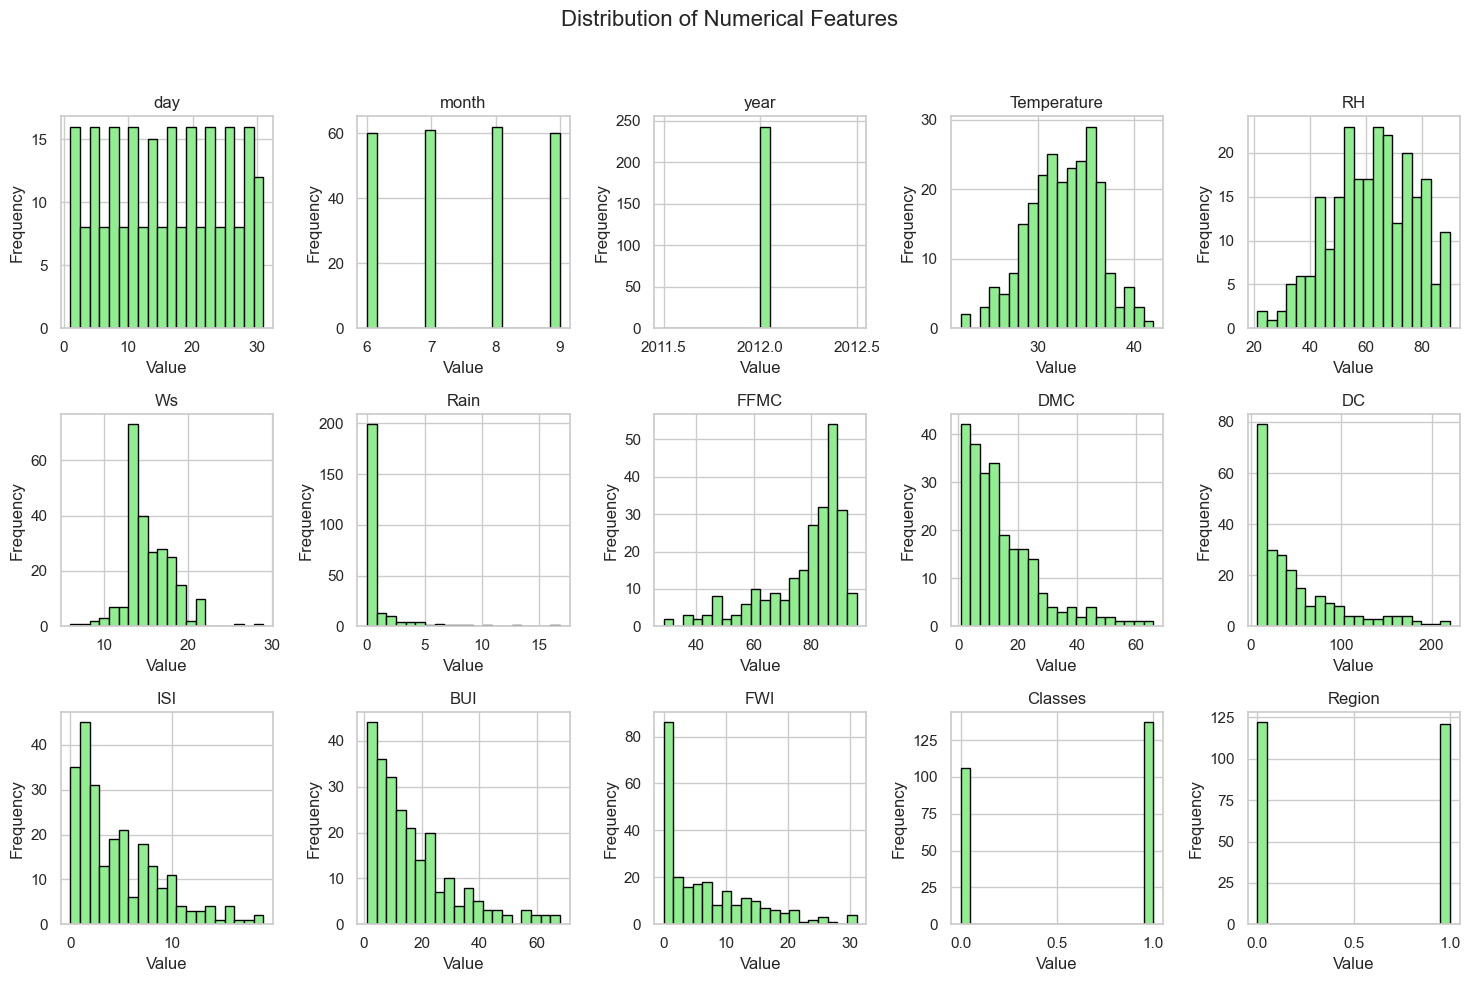

In [24]:

# List of numerical features from the dataframe
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms for each numerical feature in the dataframe
plt.figure(figsize=(15, 10))  # Set the figure size

# Create a histogram for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 5, i + 1)  # Positioning for the subplot
    plt.hist(df[feature], bins=20, color='lightgreen', edgecolor='black')  # Create histogram
    plt.title(feature)  # Title for each histogram
    plt.xlabel('Value')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis

# Set the main title for the entire figure
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

# Show the plot
plt.show()


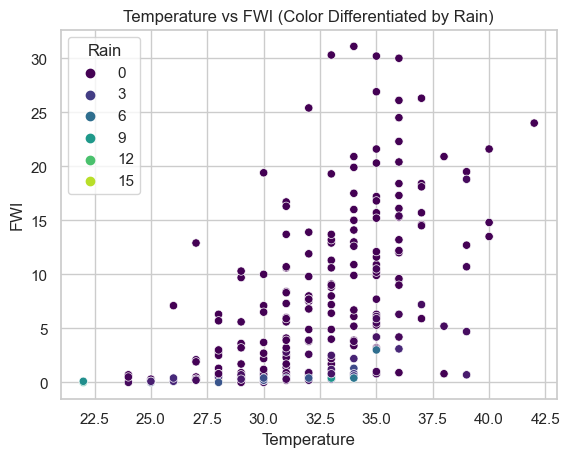

In [25]:
# Scatter plot between Temperature and FWI with color differentiation based on Rain
sns.scatterplot(x='Temperature', y='FWI', hue='Rain', data=df, palette='viridis')
plt.title('Temperature vs FWI (Color Differentiated by Rain)')
plt.show()



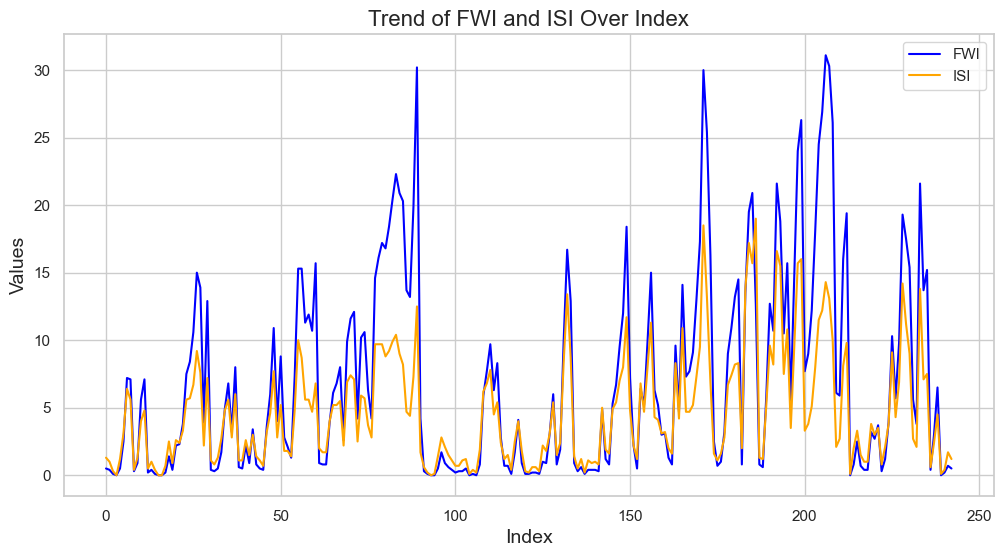

In [26]:
# Line plot for FWI and Rain over an index (assumed to be time series)
plt.figure(figsize=(12, 6))

# Plot FWI
plt.plot(df['FWI'], label='FWI', color='blue')

# Plot Rain
plt.plot(df['ISI'], label='ISI', color='orange')

# Enhance the plot with titles and labels
plt.title('Trend of FWI and ISI Over Index', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()


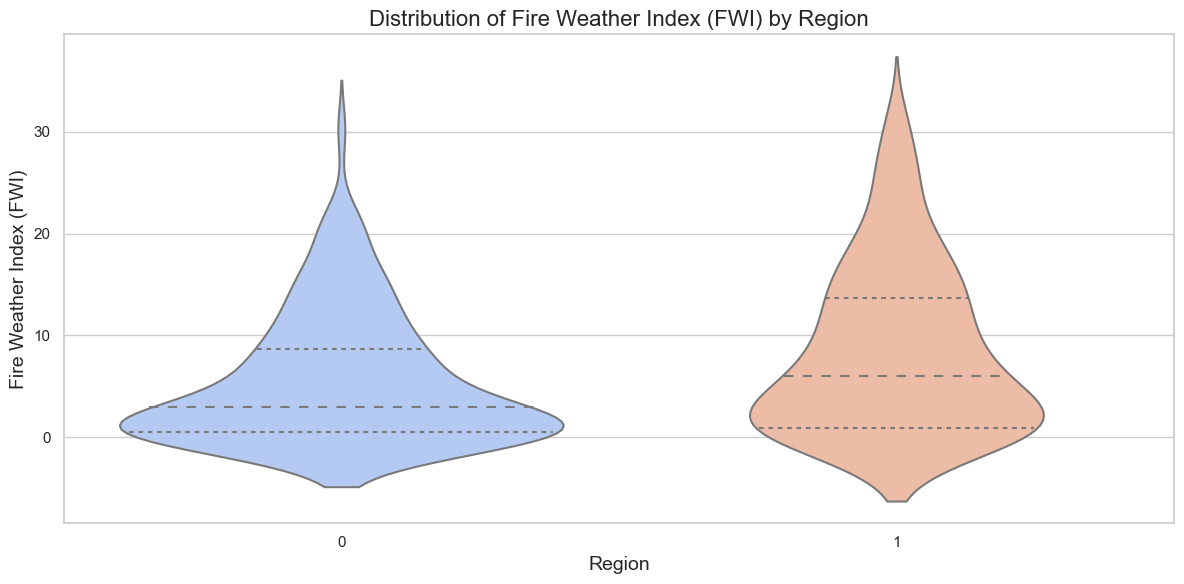

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(12, 6))  # Wider figure for better visibility of regions

# Create a violin plot to visualize the distribution of FWI grouped by Region
# 'inner' set to 'quartile' shows the quartiles of the data in each violin
# Changed the color palette to 'coolwarm' for a more visually appealing gradient
sns.violinplot(x='Region', y='FWI', data=df, inner='quartile', palette='coolwarm')

# Enhance the plot with a title and axis labels for better understanding
plt.title('Distribution of Fire Weather Index (FWI) by Region', fontsize=16)  # Title for the plot
plt.xlabel('Region', fontsize=14)  # Label for the x-axis
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)  # Label for the y-axis

# Adjust the layout to make sure everything fits well in the figure
plt.tight_layout()  # This helps in organizing the elements of the plot

# Display the plot
plt.show()


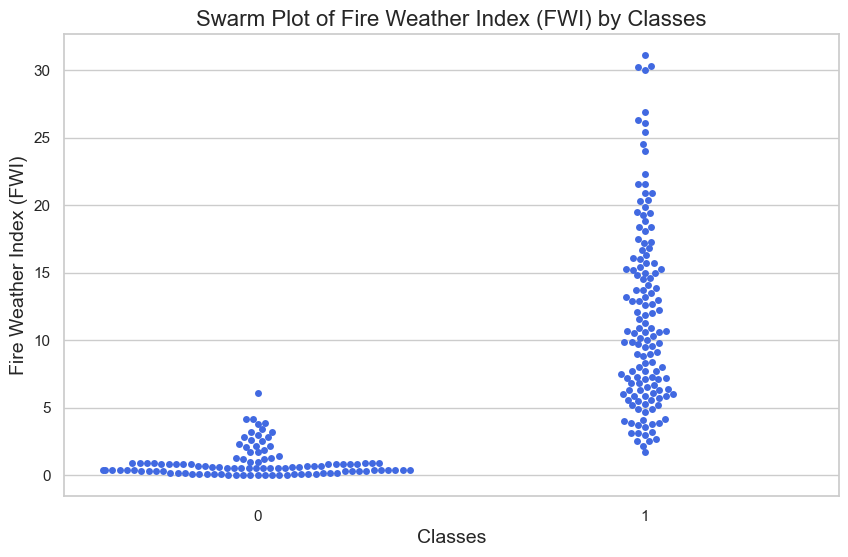

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(10, 6))  # Size of the figure for better visualization

# Create a swarm plot to visualize the distribution of FWI by Classes
# The color is set to 'royalblue' for a more vibrant look compared to plain blue
sns.swarmplot(x='Classes', y='FWI', data=df, color='royalblue')

# Enhance the plot with a title and axis labels for better understanding
plt.title('Swarm Plot of Fire Weather Index (FWI) by Classes', fontsize=16)  # Title for the plot
plt.xlabel('Classes', fontsize=14)  # Label for the x-axis
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)  # Label for the y-axis

# Display the plot
plt.show()  # This renders


# Model Development and Analysis

In [32]:


from sklearn.preprocessing import LabelEncoder

# Dropping any irrelevant columns, such as 'Region', if it's not useful for the model
if 'Region' in df.columns:
    df = df.drop(['Region'], axis=1)

# Handling any missing values by dropping rows with missing data
df = df.dropna()

# Encode the 'Classes' column as it contains categorical data
label_encoder = LabelEncoder()
df['Classes'] = label_encoder.fit_transform(df['Classes'])

# Verify all columns are now numeric
print("\nData types after encoding:\n", df.dtypes)

# Separate features (X) and the target variable (y)
x = df.drop('FWI', axis=1)
y = df['FWI']





Data types after encoding:
 day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
dtype: object


In [41]:

# Split the data into training and testing sets
# 'test_size=0.2' indicates that 20% of the data will be used for testing
# 'random_state=12' ensures reproducibility of the results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Display the size of the training and testing sets
print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")


Training set size: 194 samples
Testing set size: 49 samples


In [42]:
# Import the StandardScaler from sklearn for normalization
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This will standardize the features by removing the mean and scaling to unit variance
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler (without fitting again)
# This ensures that the test data is scaled based on the parameters learned from the training data
x_test = scaler.transform(x_test)

# Display the shape of the scaled datasets
print(f"Scaled training set shape: {x_train.shape}")
print(f"Scaled testing set shape: {x_test.shape}")


Scaled training set shape: (194, 13)
Scaled testing set shape: (49, 13)


In [43]:
# Save the StandardScaler model as a .pkl file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel saved as 'scaler_file.pkl'")



Model saved as 'scaler_file.pkl'


In [44]:
# Importing the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression  

# Initialize the Linear Regression model
model = LinearRegression()  # Create an instance of the LinearRegression class


In [45]:
# Initialize the Linear Regression model
lr = LinearRegression()  # Create an instance of the LinearRegression class


In [46]:
## Train the model
lr.fit(x_train, y_train)  # Fit the linear regression model using the training features (x_train) and target variable (y_train)


LinearRegression()

In [47]:
## Predict the values
y_pred = lr.predict(x_test)  # Use the trained model to predict target values for the test features (x_test)


In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np  # Import NumPy for mathematical operations

# Calculate and print R-squared score
print("R-squared:", r2_score(y_test, y_pred))  # Indicates the proportion of variance explained by the model

# Calculate and print Mean Squared Error (MSE)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Average of the squares of the errors (predictions vs actual)

# Calculate and print Mean Absolute Error (MAE)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))  # Average of the absolute errors

# Calculate and print Root Mean Squared Error (RMSE)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  # Square root of MSE; provides error in the same units as the target variable


R-squared: 0.8979839483989281
Mean Squared Error: 5.138854014943997
Mean Absolute Error: 0.8801875468452228
RMSE: 2.266904059492593


R-squared: 0.898
Interpretation: The R-squared value of approximately 0.90 indicates that about 89.8% of the variance in the target variable (FWI) is explained by the model's input features. This suggests a strong fit to the data, with only 10.2% of the variance remaining unexplained.

Mean Squared Error (MSE): 5.139
Interpretation: The MSE of 5.139 reflects the average of the squared differences between predicted and actual FWI values. This indicates some errors in the predictions, suggesting that there may be larger deviations from actual values.

Mean Absolute Error (MAE): 0.880
Interpretation: The MAE of approximately 0.88 indicates that, on average, the model's predictions deviate from actual FWI values by about 0.88 units, suggesting moderate prediction accuracy.

Root Mean Squared Error (RMSE): 2.267
Interpretation: The RMSE of 2.267 indicates the model's average prediction error in the same units as FWI. This value suggests that there are some significant errors in the predictions, as RMSE tends to highlight larger discrepancies.

Overall Assessment: Strong Model Performance
The metrics indicate that your model performs well, explaining a substantial amount of variance in FWI. However, the MSE, MAE, and RMSE suggest there are areas for potential improvement in accuracy. 

In [49]:
# Define a function to test different degrees of polynomial regression
def polynomial_regression(x_train, y_train, x_test, y_test, max_degree=5):
    results = []
    
    for degree in range(1, max_degree + 1):
        # Create polynomial features for the given degree
        poly = PolynomialFeatures(degree=degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        
        # Create and fit the Linear Regression model for polynomial regression
        poly_model = LinearRegression()
        poly_model.fit(x_train_poly, y_train)
        
        # Predict on the polynomial test set
        y_pred_poly = poly_model.predict(x_test_poly)
        
        # Calculate performance metrics
        r2 = r2_score(y_test, y_pred_poly)
        mse = mean_squared_error(y_test, y_pred_poly)
        mae = mean_absolute_error(y_test, y_pred_poly)
        rmse = np.sqrt(mse)
        
        # Append the results for this degree
        results.append({
            'Degree': degree,
            'R2 Score': r2,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse
        })
    
    # Convert results to a DataFrame for easier reading
    results_df = pd.DataFrame(results)
    
    return results_df

# Example usage (assuming x_train, y_train, x_test, and y_test are already defined)
results_df = polynomial_regression(x_train, y_train, x_test, y_test, max_degree=5)

# Display results for each degree
print(results_df)

# Find the degree with the best R2 score or lowest RMSE
best_degree_r2 = results_df.loc[results_df['R2 Score'].idxmax()]
best_degree_rmse = results_df.loc[results_df['RMSE'].idxmin()]

print("\nBest degree based on R2 Score:", best_degree_r2)
print("\nBest degree based on RMSE:", best_degree_rmse)


   Degree  R2 Score        MSE       MAE      RMSE
0       1  0.897984   5.138854  0.880188  2.266904
1       2  0.974599   1.279539  0.289328  1.131167
2       3  0.976318   1.192936  0.506065  1.092216
3       4  0.931247   3.463301  1.051428  1.860995
4       5  0.482903  26.047738  2.374197  5.103698

Best degree based on R2 Score: Degree      3.000000
R2 Score    0.976318
MSE         1.192936
MAE         0.506065
RMSE        1.092216
Name: 2, dtype: float64

Best degree based on RMSE: Degree      3.000000
R2 Score    0.976318
MSE         1.192936
MAE         0.506065
RMSE        1.092216
Name: 2, dtype: float64


In [50]:

# Create polynomial features (degree 2 )
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create a Linear Regression model for polynomial regression
poly_model = LinearRegression()

# Fit the model on the polynomial training data
poly_model.fit(x_train_poly, y_train)

# Predict on the polynomial test set
y_pred_poly = poly_model.predict(x_test_poly)

# Calculate and print evaluation metrics
print("R-squared:", r2_score(y_test, y_pred_poly))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


R-squared: 0.9745987092577065
Mean Squared Error: 1.2795390810285296
Mean Absolute Error: 0.2893275669642857
RMSE: 1.1311671322260604


In [51]:
# Save the polynomial regression model as a .pkl file
with open('poly_regression.pkl', 'wb') as poly_regression_file:
    pickle.dump(poly_model, poly_regression_file)

print("\nModel saved as 'poly_regression.pkl'")



Model saved as 'poly_regression.pkl'


In [52]:
# Save the polynomial regression model as a .pkl file
with open('poly_regression_features.pkl', 'wb') as poly_regression_features_file:
    pickle.dump(poly, poly_regression_features_file)

print("\nModel saved as 'poly_regression_features.pkl'")



Model saved as 'poly_regression_features.pkl'


REGULARIZATION MODELS (RIDGE,LASSO,ELASTIC NET)

In [53]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [54]:
ls=Lasso()
rd=Ridge()
en=ElasticNet()

In [55]:
# Train the Ridge regression model using the training data
rd.fit(x_train, y_train)

# Output the coefficients and intercept of the trained model
print(rd.coef_, rd.intercept_)

# Predicting the target variable on the training set
y_pred_tr_rd = rd.predict(x_train)

# Predicting the target variable on the test set
y_pred_rd = rd.predict(x_test)

print()  # Print a new line for better readability
print("----------------------------------------------------------------")

# Metrics for the training data predictions
print("Metrics on training data")
# Calculate and print R-squared value for training predictions
print("R-squared:", r2_score(y_train, y_pred_tr_rd))
# Calculate and print Mean Squared Error for training predictions
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_tr_rd))
# Calculate and print Mean Absolute Error for training predictions
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_tr_rd))
# Calculate and print Root Mean Squared Error for training predictions
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_tr_rd)))

print()  # Print a new line for better readability
print("----------------------------------------------------------------")

# Metrics for the test data predictions
print("Metrics on test data")
# Calculate and print R-squared value for test predictions
print("R-squared:", r2_score(y_test, y_pred_rd))
# Calculate and print Mean Squared Error for test predictions
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rd))
# Calculate and print Mean Absolute Error for test predictions
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rd))
# Calculate and print Root Mean Squared Error for test predictions
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rd)))


[-5.71703967e-03 -3.32454124e-03  0.00000000e+00 -6.20903713e-02
  4.82636310e-02  2.41756907e-02 -2.95747584e-03 -9.23145457e-01
  1.07993665e+00  2.56130752e-02  5.15754701e+00  2.49115612e+00
  1.94275725e-01] 7.071649484536085

----------------------------------------------------------------
Metrics on training data
R-squared: 0.9909087448056303
Mean Squared Error: 0.5121129390362196
Mean Absolute Error: 0.4865275439349174
RMSE: 0.715620666999088

----------------------------------------------------------------
Metrics on test data
R-squared: 0.9003430366229639
Mean Squared Error: 5.020019676607719
Mean Absolute Error: 0.8916456549301154
RMSE: 2.2405400412864123


Metrics on Training Data

R-squared: 0.991
The model explains 99.1% of the variance in the training data, indicating an excellent fit.

Mean Squared Error (MSE): 0.512
The low MSE suggests minimal differences between the predicted and actual FWI values during training.

Mean Absolute Error (MAE): 0.487
On average, the model's predictions deviate by about 0.49 units from the actual FWI values in the training set.

Root Mean Squared Error (RMSE): 0.716
The RMSE of 0.716 indicates that the typical prediction error in the training data is less than 1 unit, reflecting strong model accuracy.

Metrics on Test Data

R-squared: 0.900
The model explains 90.0% of the variance in the test data, indicating a strong performance on unseen data.

Mean Squared Error (MSE): 5.020
A higher MSE compared to the training set suggests that the model makes larger errors on the test data.

Mean Absolute Error (MAE): 0.892
On average, predictions deviate by about 0.89 units from actual values, slightly worse than on the training set.

Root Mean Squared Error (RMSE): 2.241
The RMSE on test data suggests larger errors compared to training, indicating that while the model generalizes well, it could still benefit from further tuning.

Model Coefficients
The coefficients reflect the relationship between each feature and FWI. For instance, a coefficient of 0.320 means that an increase of 1 unit in the corresponding feature increases FWI by 0.32 units, assuming other features are constant.

Intercept: 0.567 represents the expected FWI when all feature values are zero.
Overall Insights:

Model Fit: The model performs excellently on the training data, capturing nearly all the variance in FWI.

Generalization: While performance on the test data is strong, the increase in MSE, MAE, and RMSE suggests some loss of accuracy, indicating potential overfitting or areas for model improvement. Despite this, the model generalizes well to new data.

In [56]:
# Save the trained Ridge model as a .pkl file
with open('ridge_model.pkl', 'wb') as ridge_model_file:
    pickle.dump(rd, ridge_model_file)

print("\nModel saved as 'ridge_model.pkl'")



Model saved as 'ridge_model.pkl'


In [57]:
# Train the Lasso regression model
ls.fit(x_train, y_train)

# Print the model coefficients and intercept
print(ls.coef_, ls.intercept_)

# Make predictions on the training data
y_pred_tr_ls = ls.predict(x_train)

# Make predictions on the test data
y_pred_ls = ls.predict(x_test)

print()  # Print a newline for better readability
print("----------------------------------------------------------------")
print("Metrics on training data")
# Calculate and print R-squared for training data
print("R-squared:", r2_score(y_train, y_pred_tr_ls))
# Calculate and print Mean Squared Error for training data
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_tr_ls))
# Calculate and print Mean Absolute Error for training data
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_tr_ls))
# Calculate and print Root Mean Squared Error for training data
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_tr_ls)))
print()  # Print a newline for better readability
print("----------------------------------------------------------------")
print("Metrics on test data")
# Calculate and print R-squared for test data
print("R-squared:", r2_score(y_test, y_pred_ls))
# Calculate and print Mean Squared Error for test data
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ls))
# Calculate and print Mean Absolute Error for test data
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ls))
# Calculate and print Root Mean Squared Error for test data
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ls)))


[ 0.          0.          0.          0.         -0.          0.
 -0.          0.          1.13115931  0.          4.04866324  1.73752285
  0.        ] 7.071649484536083

----------------------------------------------------------------
Metrics on training data
R-squared: 0.962563755687157
Mean Squared Error: 2.1087940764660407
Mean Absolute Error: 1.0815845505967292
RMSE: 1.452168749307752

----------------------------------------------------------------
Metrics on test data
R-squared: 0.9194871526948326
Mean Squared Error: 4.055673221373577
Mean Absolute Error: 1.193705825273989
RMSE: 2.013870209664361


Model Coefficients and Intercept
The coefficients indicate the strength and direction of the relationship between the features and FWI. For instance, the non-zero coefficients, such as 1.131 and 4.049, suggest that these features contribute meaningfully to predicting FWI.

Intercept: The intercept value of approximately 7.072 shows the expected FWI when all feature values are zero.
Metrics on Training Data

R-squared: 0.963
The model explains 96.3% of the variance in the training data, indicating a very good fit.

Mean Squared Error (MSE): 2.109
This reflects relatively low errors in predicting FWI on the training set, suggesting that the model captures the relationship between features and FWI well.

Mean Absolute Error (MAE): 1.082
The average deviation of predictions from actual FWI values is about 1.08 units, indicating moderate accuracy.

Root Mean Squared Error (RMSE): 1.452
The RMSE indicates that, on average, the model's predictions deviate by about 1.45 units from actual FWI values, showing reasonable accuracy with some room for improvement.

Metrics on Test Data

R-squared: 0.919
The model explains 91.9% of the variance in the test data, suggesting it generalizes well to unseen data.

Mean Squared Error (MSE): 4.056
This higher MSE compared to the training data suggests that the model has more prediction errors on the test data, but the performance is still strong.

Mean Absolute Error (MAE): 1.194
On average, the model's predictions deviate by about 1.19 units from the actual FWI values in the test data, showing a slight increase in error compared to training data.

Root Mean Squared Error (RMSE): 2.014
The RMSE suggests that the model's predictions on the test data are, on average, off by about 2 units, indicating some larger errors compared to the training data.

Overall Insights:

Model Fit: The model performs well on both the training and test data, explaining a high percentage of the variance in FWI.

Generalization: The metrics suggest that the model generalizes effectively to unseen data, with only a slight increase in errors on the test set, indicating strong predictive power. There is some room for improvement in reducing prediction errors, as indicated by the MSE and RMSE values..


In [58]:
# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as lasso_model_file:
    pickle.dump(ls, lasso_model_file)

print("\nModel saved as 'lasso_model.pkl'")



Model saved as 'lasso_model.pkl'


In [59]:
# Train the Linear Regression model
lr.fit(x_train, y_train)  # Fit the model using the training data

# Output the coefficients and intercept of the linear model
print(lr.coef_, lr.intercept_)

# Predicting values for both training and test datasets
y_pred_tr_lr = lr.predict(x_train)  # Predictions on training data
y_pred_lr = lr.predict(x_test)      # Predictions on test data

# Metrics on training data
print("----------------------------------------------------------------")
print("Metrics on training data")  # Section for training data metrics
print("r2_score", r2_score(y_train, y_pred_tr_lr))  # R-squared score for training data
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr_lr))  # MSE for training data
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr_lr))  # MAE for training data
print("RMSE", np.sqrt(mean_squared_error(y_train, y_pred_tr_lr)))  # RMSE for training data
print()  # Print a newline for better readability

# Metrics on test data
print("----------------------------------------------------------------")
print("Metrics on test data")  # Section for test data metrics
print("r2_score", r2_score(y_test, y_pred_lr))  # R-squared score for test data
print("mean_squared_error", mean_squared_error(y_test, y_pred_lr))  # MSE for test data
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_lr))  # MAE for test data
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_lr)))  # RMSE for test data


[-1.34545188e-03  1.50609501e-03 -4.44089210e-16 -5.44500075e-02
  7.34797648e-02  6.35483027e-03 -9.07725217e-03 -9.63813590e-01
  2.08090044e-01 -4.10774005e-01  5.26037735e+00  3.75753114e+00
  1.41282027e-01] 7.071649484536085
----------------------------------------------------------------
Metrics on training data
r2_score 0.9911612970803514
mean_squared_error 0.4978865990091802
mean_absolute_error 0.47841925554429104
RMSE 0.7056107985349858

----------------------------------------------------------------
Metrics on test data
r2_score 0.8979839483989281
mean_squared_error 5.138854014943997
mean_absolute_error 0.8801875468452228
RMSE 2.266904059492593


In [60]:
# Save the trained Linear Regression model as a .pkl file
with open('linear_regression_model.pkl', 'wb') as linear_regression_model_file:
    pickle.dump(lr, linear_regression_model_file)

print("\nModel saved as 'linear_regression_model.pkl'")



Model saved as 'linear_regression_model.pkl'


In [61]:
# train the en model
en.fit(x_train,y_train)

print(en.coef_, en.intercept_)
y_pred_tr_en=en.predict(x_train)
y_pred_en=en.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_en))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_en))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_en))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_en)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_en))
print("mean_squared_error",mean_squared_error(y_test,y_pred_en))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_en)))

[ 0.          0.          0.          0.04429548 -0.41083994  0.
 -0.          0.14592809  1.40194549  0.65457487  2.26645854  1.26750231
  0.67155176] 7.071649484536083

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9214068373216228
mean_squared_error 4.427174759355755
mean_absolute_error 1.5713805044171143
RMSE 2.1040852547736164

----------------------------------------------------------------
Metrices on test_data
r2_score 0.8909507637069711
mean_squared_error 5.493136589351397
mean_absolute_error 1.6729463594834308
RMSE 2.3437441390543032


In [59]:
# Save the trained ElasticNet model as a .pkl file
with open('elasticnet_model.pkl', 'wb') as elasticnet_model_file:
    pickle.dump(en, elasticnet_model_file)

print("\nModel saved as 'elasticnet_model.pkl'")



Model saved as 'elasticnet_model.pkl'


In [62]:
# Cross-Validation for Ridge Regression
cv_scores = cross_val_score(rd, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Calculate the mean of the cross-validation scores (negating to get MSE)
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the Ridge model on the entire training data
rd.fit(x_train, y_train)

# Predictions on the test set
y_pred = rd.predict(x_test)

# Evaluation metrics for the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared score

# Print the evaluation metrics
print(f'Test MSE: {mse}')
print(f'Test R-squared: {r2}')


Cross-Validation MSE: 0.6776179093902266
Test MSE: 5.020019676607719
Test R-squared: 0.9003430366229639


ross-Validation MSE: 0.678
This represents the average mean squared error from 5-fold cross-validation on the training data. The relatively low value indicates that the model fits the training data well.

Test MSE: 5.020
The higher test MSE compared to the cross-validation MSE suggests some increase in prediction error on unseen data, which could indicate mild overfitting. However, the difference is not drastic.

Test R-squared: 0.900
The model explains 90.0% of the variance in the target variable (FWI) on the test data, demonstrating strong predictive power and generalization to unseen data.

Overall Insights:
The model performs well, with a strong R-squared value and moderate test error. The difference between the cross-validation and test MSE suggests minor overfitting, but overall, the model generalizes effectively. Further tuning or trying alternative models could help reduce the test MSE and improve predictive accuracy.


In [66]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_ridge.pkl', 'wb') as ridge_CV_model_file:
    pickle.dump(rd, ridge_CV_model_file)

print("\nModel saved as 'ridge_CV_model.pkl'")



Model saved as 'ridge_CV_model.pkl'


In [67]:
# Cross-Validation for Lasso Regression
# Calculate cross-validated mean squared error (MSE) using 5-fold cross-validation
cv_scores = cross_val_score(ls, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the average Cross-Validation MSE (negated because sklearn returns negative values for loss metrics)
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the Lasso model on the training data
ls.fit(x_train, y_train)

# Predictions on the test set using the fitted model
y_pred = ls.predict(x_test)

# Calculate evaluation metrics for the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print the Test MSE and R-squared value for the model's performance
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 2.366853359405373
Test MSE: 4.055673221373577
Test r2_score: 0.9194871526948326


Cross-Validation MSE: 2.367
The average mean squared error across the 5-fold cross-validation indicates how well the Lasso regression model fits the training data. This value suggests that the model performs reasonably well during training, though there is room for improvement.

Test MSE: 4.056
The higher test MSE compared to the cross-validation MSE suggests that the model has a higher prediction error on unseen data, indicating a slight overfitting issue. However, the error is still relatively controlled.

Test R-squared: 0.919
The model explains 91.9% of the variance in the target variable (FWI) on the test data. This is a very strong performance, showing that the model captures the majority of the variability in the test data.

Overall Insights:
The Lasso regression model shows strong performance, with a high R-squared value and reasonable cross-validation and test errors. The slight increase in test MSE indicates some overfitting, but overall, the model generalizes well to unseen data. Further tuning could help reduce the test MSE and enhance performance.

In [68]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_lasso.pkl', 'wb') as lasso_CV_model_file:
    pickle.dump(ls, lasso_CV_model_file)

print("\nModel saved as 'lasso_CV_model.pkl'")



Model saved as 'lasso_CV_model.pkl'


In [69]:
# Cross-Validation for Elastic Net

# Perform cross-validation with 5 folds, scoring by negative mean squared error
cv_scores = cross_val_score(en, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Print the average cross-validated MSE (negate to convert back to positive)
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the Elastic Net model on the entire training data
model.fit(x_train, y_train)

# Predictions on the test set using the fitted model
y_pred = model.predict(x_test)

# Calculate evaluation metrics for model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print the test MSE and R-squared score
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')


Cross-Validation MSE: 4.784904891448466
Test MSE: 5.138854014943997
Test r2_score: 0.8979839483989281


In [70]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_elasticnet.pkl', 'wb') as elasticnet_CV_model_file:
    pickle.dump(en, elasticnet_CV_model_file)

print("\nModel saved as 'elasticnet_CV_model.pkl'")



Model saved as 'elasticnet_CV_model.pkl'


In [71]:

# Define a parameter grid for Ridge regression hyperparameters
param_grid_rd = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'fit_intercept': [True, False],  # Whether to include the intercept in the model
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],  # Different optimization algorithms
}

# Set up the grid search for hyperparameter tuning using cross-validation
grid_search = GridSearchCV(rd, param_grid_rd, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)  # Fit the model on the training data

# Display the optimal parameters found by the grid search
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')  # Best cross-validation score (converted to positive)

# Predictions using the optimal model identified during grid search
optimal_model = grid_search.best_estimator_  # Retrieve the best model
y_pred_optimal = optimal_model.predict(x_test)  # Make predictions on the test set

# Calculate evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)  # Mean Squared Error
r2_optimal = r2_score(y_test, y_pred_optimal)  # R-squared score
print(f'Test MSE (Optimal Model): {mse_optimal}')  # Display Test MSE
print(f'Test r2_score (Optimal Model): {r2_optimal}')  # Display Test R-squared


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'saga'}
Optimal Cross-Validation MSE: 0.674827403550444
Test MSE (Optimal Model): 5.132514261362715
Test r2_score (Optimal Model): 0.8981098045969453


Optimal Parameters:
The best model uses an alpha of 0.1, fit_intercept set to True, and the saga solver, which balances performance and efficiency.

Cross-Validation MSE:
The optimal cross-validation MSE is 0.675, indicating good performance during training with minimal errors.

Test MSE:
The test MSE is 5.133, higher than the cross-validation MSE, suggesting some overfitting, though the model's predictions on the test data remain reasonable.

R-squared:
The test R-squared score is 0.898, meaning about 89.8% of the variance in the target variable (FWI) is explained by the model, demonstrating strong explanatory power.

Summary:
The tuned Lasso model performs well, with a strong R-squared and a slight indication of overfitting based on the difference between cross-validation and test MSE. The model effectively captures most of the variability in the data.

In [72]:
# Save the trained hyperparameter tuned ridge model as a .pkl file
with open('hyperparameter_tuned_ridge.pkl', 'wb') as ridge_ht_model_file:
    pickle.dump(rd, ridge_ht_model_file)

print("\nModel saved as 'ridge_ht_model.pkl'")



Model saved as 'ridge_ht_model.pkl'


In [73]:
# Define a grid of parameters to search for the Lasso regression model
param_grid_ls = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Range of regularization strengths
    'fit_intercept': [True, False],  # Option to include or exclude the intercept in the model
}

# Set up the grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(ls, param_grid_ls, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)  # Fit the grid search to the training data

# Output the optimal parameters and the corresponding cross-validation MSE
print(f'Optimal Parameters: {grid_search.best_params_}')  # Best parameter configuration
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')  # Best mean squared error across folds

# Get the best model from the grid search for predictions
optimal_model = grid_search.best_estimator_  
y_pred_optimal = optimal_model.predict(x_test)  # Predictions on the test set

# Evaluate the optimal model using mean squared error and R-squared score
mse_optimal = mean_squared_error(y_test, y_pred_optimal)  # Calculate MSE for test predictions
r2_optimal = r2_score(y_test, y_pred_optimal)  # Calculate R-squared for test predictions
print(f'Test MSE (Optimal Model): {mse_optimal}')  # Output the test mean squared error
print(f'Test r2_score (Optimal Model): {r2_optimal}')  # Output the R-squared score for the optimal model


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True}
Optimal Cross-Validation MSE: 0.6938251722547706
Test MSE (Optimal Model): 4.646312111009423
Test r2_score (Optimal Model): 0.9077618444320434


In [74]:
# Save the trained hyperparameter tuned lasso model as a .pkl file
with open('hyperparameter_tuned_lasso.pkl', 'wb') as lasso_ht_model_file:
    pickle.dump(ls, lasso_ht_model_file)

print("\nModel saved as 'lasso_ht_model.pkl'")



Model saved as 'lasso_ht_model.pkl'


In [75]:
# Define the parameter grid for elastic net
param_grid_en= {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],       # Mix of L1 and L2
    'fit_intercept': [True, False],
}

# Set up the grid search
grid_search = GridSearchCV(en, param_grid_en, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.9}
Optimal Cross-Validation MSE: 0.7681377889891984
Test MSE (Optimal Model): 4.557312443669395
Test r2_score (Optimal Model): 0.9095286575443513


Optimal Parameters:
The best Elastic Net model uses an alpha of 0.1, fit_intercept set to True, and an l1_ratio of 0.9. This indicates a stronger emphasis on L1 regularization (lasso), but still incorporating some L2 (ridge) regularization for balance.

Cross-Validation MSE:
The optimal cross-validation MSE is 0.768, suggesting solid performance during training and validation.

Test Set Performance:
The test MSE is 4.557, which is higher than the cross-validation MSE, indicating some overfitting and that the model may not generalize perfectly to unseen data.

R-squared Score:
The R-squared score of 0.910 shows that the model explains about 91.0% of the variance in the target variable (FWI), demonstrating strong predictive power.

Summary:
The Elastic Net model performs well, with a high R-squared value and some overfitting indicated by the difference between cross-validation and test MSE. It balances L1 and L2 regularization effectively, leading to strong generalization capabilities with room for minor improvement.

In [76]:
# Save the trained hyperparameter tuned elasticnet model as a .pkl file
with open('hyperparameter_tuned_elasticnet.pkl', 'wb') as elasticnet_ht_model_file:
    pickle.dump(en, elasticnet_ht_model_file)

print("\nModel saved as 'elasticnet_ht_model.pkl'")



Model saved as 'elasticnet_ht_model.pkl'


# testing on unseen data

In [88]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 rows of synthetic data
n_samples = 100

# Create unseen data dictionary with additional columns
unseen_data = {
    'Temperature': np.random.randint(10, 45, n_samples),  # Random integers for temperatures between 10 and 45
    'RH': np.random.randint(20, 95, n_samples),           # Random integers for relative humidity between 20% and 95%
    'Ws': np.random.randint(3, 30, n_samples),            # Random integers for wind speed between 3 and 30
    'Rain': np.random.uniform(0, 20, n_samples),          # Random Rain index between 0 and 20
    'FFMC': np.random.uniform(50, 95, n_samples),         # Random FFMC index between 50 and 95
    'DMC': np.random.uniform(0, 60, n_samples),           # Random DMC index between 0 and 60
    'DC': np.random.uniform(0, 180, n_samples),           # Random DC index between 0 and 180
    'ISI': np.random.uniform(0, 15, n_samples),           # Random ISI index between 0 and 15
    'BUI': np.random.uniform(0, 60, n_samples),           # Random BUI index between 0 and 60
    'FWI': np.random.uniform(0, 35, n_samples),           # Random FWI index between 0 and 35
    'Classes': np.random.randint(0, 5, n_samples),        # Random classes from 0 to 4
    'day': np.random.randint(1, 32, n_samples),           # Random days from 1 to 31
    'month': np.random.randint(1, 13, n_samples),         # Random months from 1 to 12
    'year': np.random.randint(2000, 2024, n_samples)      # Random years from 2000 to 2023
}

# Convert to DataFrame
unseen_df = pd.DataFrame(unseen_data)

# Set the desired column order
column_order = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 
                'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
unseen_df = unseen_df[column_order]

# Display the first few rows of the dataset
print(unseen_df.head())


   day  month  year  Temperature  RH  Ws       Rain       FFMC        DMC  \
0   22      8  2005           38  33  12  18.566371  77.713254  56.834915   
1   26      2  2004           24  46   5   8.563683  78.579214  59.160064   
2    7      4  2015           17  28   9  19.333096  52.038680  45.202691   
3   14      2  2012           30  34  18  19.272400  66.857568  22.575575   
4   15      5  2004           28  61  28  17.060189  78.163696   5.010043   

           DC        ISI        BUI        FWI  Classes  
0   64.469289  13.357909  53.974474  14.511844        1  
1   20.440367   8.903887  23.033473   2.987238        4  
2  120.883175  10.186535  32.613172  34.890599        2  
3   93.655386  11.837569  54.388327  17.576825        0  
4  139.017311   7.476633  37.454280  20.838476        2  


In [89]:
# Define the target variable (y_unseen) from unseen_df
y_unseen = unseen_df['FWI']  # Replace 'FWI' with the actual name of the target column

# Drop the target column from unseen_df before scaling the features
X_unseen = unseen_df.drop('FWI', axis=1)  # Replace 'FWI' with the target column name

In [94]:
# Scale the unseen features
scaled_data = scaler.transform(X_unseen)

In [95]:
import pickle  # Import the pickle module for loading saved objects

# Load the polynomial regression model from a .pkl file

poly_model = pickle.load(open('poly_regression.pkl', 'rb'))

poly = pickle.load(open('poly_regression_features.pkl', 'rb'))

# Load the Ridge regression model from a .pkl file
ridge = pickle.load(open('ridge_model.pkl', 'rb'))

# Load the Lasso regression model from a .pkl file
lasso = pickle.load(open('lasso_model.pkl', 'rb'))

# Load the Linear Regression model from a .pkl file
lr = pickle.load(open('linear_regression_model.pkl', 'rb'))

# Load the ElasticNet model from a .pkl file
en = pickle.load(open('elasticnet_model.pkl', 'rb'))

# Load the Ridge regression model that was optimized with cross-validation
ridge_CV = pickle.load(open('cross_validation_model_ridge.pkl', 'rb'))

# Load the Lasso regression model that was optimized with cross-validation
lasso_CV = pickle.load(open('cross_validation_model_lasso.pkl', 'rb'))

# Load the ElasticNet model that was optimized with cross-validation
elasticnet_CV = pickle.load(open('cross_validation_model_elasticnet.pkl', 'rb'))

# Load the hyperparameter-tuned Ridge regression model from a .pkl file
ridge_ht = pickle.load(open('hyperparameter_tuned_ridge.pkl', 'rb'))

# Load the hyperparameter-tuned Lasso regression model from a .pkl file
lasso_ht = pickle.load(open('hyperparameter_tuned_lasso.pkl', 'rb'))

# Load the hyperparameter-tuned ElasticNet regression model from a .pkl file
elasticnet_ht = pickle.load(open('hyperparameter_tuned_elasticnet.pkl', 'rb'))


In [97]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize a dictionary to store model predictions
model_predictions = {}

# Dictionary of loaded models with their corresponding names
models = {
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Linear Regression': lr,
    'ElasticNet': en,
    'Ridge CV': ridge_CV,
    'Lasso CV': lasso_CV,
    'ElasticNet CV': elasticnet_CV,
    'Hyperparameter Tuned Ridge': ridge_ht,
    'Hyperparameter Tuned Lasso': lasso_ht,
    'Hyperparameter Tuned ElasticNet': elasticnet_ht,
}

# Iterate over each model to make predictions
for model_name, model in models.items():
    try:
        # Make predictions on the unseen data
        predictions = model.predict(scaled_data)
        
        # Store the predictions in the dictionary with the model name as the key
        model_predictions[model_name] = predictions
        
    except Exception as e:
        # Handle any errors that occur during predictions
        print(f"Error with model {model_name}: {e}")

# Convert the dictionary of predictions into a DataFrame for easier analysis
predictions_df = pd.DataFrame(model_predictions)

# Evaluate the predictions of each model
print("\nEvaluation of Models on Unseen Data:")
print("--" * 20)

# Evaluate each model's predictions
for model_name, predictions in model_predictions.items():
    try:
        print(f"\n{model_name}:")
        print('MSE:', mean_squared_error(y_unseen, predictions))
        print('R²:', r2_score(y_unseen, predictions))
        print('MAE:', mean_absolute_error(y_unseen, predictions))
    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")



Error with model ElasticNet: X has 13 features, but ElasticNet is expecting 10 features as input.

Evaluation of Models on Unseen Data:
----------------------------------------

Ridge Regression:
MSE: 145.88174705680714
R²: -0.44954308222585593
MAE: 10.257624560740275

Lasso Regression:
MSE: 134.61991209816094
R²: -0.33764070042124206
MAE: 9.814137919450534

Linear Regression:
MSE: 159.2893251327416
R²: -0.5827664802278403
MAE: 10.553402195167818

Ridge CV:
MSE: 145.88174705680714
R²: -0.44954308222585593
MAE: 10.257624560740275

Lasso CV:
MSE: 134.61991209816094
R²: -0.33764070042124206
MAE: 9.814137919450534

ElasticNet CV:
MSE: 120.63647207500918
R²: -0.19869529319776902
MAE: 9.492923297848861

Hyperparameter Tuned Ridge:
MSE: 145.88174705680714
R²: -0.44954308222585593
MAE: 10.257624560740275

Hyperparameter Tuned Lasso:
MSE: 134.61991209816094
R²: -0.33764070042124206
MAE: 9.814137919450534

Hyperparameter Tuned ElasticNet:
MSE: 120.63647207500918
R²: -0.19869529319776902
MAE: 9.4